In [1]:
from tensorflow.keras.layers import Conv2D
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import cv2

In [2]:
for dir_name, _, file_name in os.walk('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray'):
    for file in file_name:
        print(os.path.join(dir_name, file))

C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\.DS_Store
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\.DS_Store
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0009-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0010-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray\test\NORMAL\IM-0011-0001.jpeg
C:/Us

In [3]:
labels=['NORMAL', 'PNEUMONIA']
def get_data(get_dir):
    data=[]
    for label in labels:
        path=os.path.join(get_dir, label)
        class_dir=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resize=cv2.resize(img_arr, (224, 224))
                data.append([resize, class_dir])
            except Exception as e:
                print(e)
    return np.array(data)


In [4]:
train=get_data('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/train/')
test=get_data('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/test/')
val=get_data('C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/val/')

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-uzca7qz1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



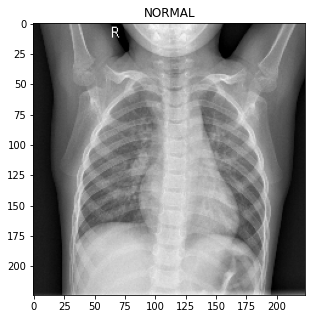

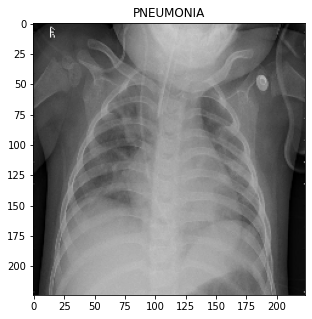

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize=(5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
plt.show()

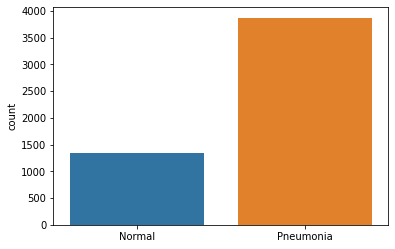

In [6]:
import seaborn as sns
data=[]
for i in train:
    if(i[1] == 0):
        data.append('Normal')
    else:
        data.append('Pneumonia')
sns.countplot(data)
plt.show()

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
def preprocessing1(path):

    image_datagen= ImageDataGenerator(
        zoom_range=0.2, 
        shear_range=0.2, 
        rescale=1/255, 
        horizontal_flip=True)

    image= image_datagen.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
    return image

In [11]:
path='C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/train'
train_data=preprocessing1(path)

Found 5216 images belonging to 2 classes.


In [12]:
def preprocessing2(path):

    image_datagen= ImageDataGenerator(rescale=1/255)

    image= image_datagen.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
    return image

In [13]:
path='C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/test'
test_data=preprocessing2(path)

Found 624 images belonging to 2 classes.


In [14]:
path='C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/chest_xray/val'
val_data=preprocessing2(path)

Found 16 images belonging to 2 classes.


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

#model checkpoints
mc = ModelCheckpoint(monitor='val_accuracy',filepath='C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/', verbose=1, save_best_only=True, mode='auto')

cd=[es,mc]

In [16]:
#Model training
hs = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=50, verbose=1, validation_data=test_data, validation_steps=16, callbacks=cd)

Epoch 1/50
8/8 [==============================] - 40s 5s/step - loss: 0.6108 - acc: 0.7227 - val_loss: 0.6640 - val_acc: 0.6270
Epoch 2/50
8/8 [==============================] - 37s 5s/step - loss: 0.6392 - acc: 0.7227 - val_loss: 0.6379 - val_acc: 0.6270
Epoch 3/50
8/8 [==============================] - 40s 5s/step - loss: 0.5264 - acc: 0.7695 - val_loss: 0.5094 - val_acc: 0.7383
Epoch 4/50
8/8 [==============================] - 38s 5s/step - loss: 0.3873 - acc: 0.8008 - val_loss: 0.7618 - val_acc: 0.7148
Epoch 5/50
8/8 [==============================] - 38s 5s/step - loss: 0.3723 - acc: 0.8672 - val_loss: 1.3305 - val_acc: 0.6875
Epoch 6/50
8/8 [==============================] - 36s 4s/step - loss: 0.3219 - acc: 0.8398 - val_loss: 0.6624 - val_acc: 0.7520
Epoch 7/50
8/8 [==============================] - 35s 4s/step - loss: 0.2911 - acc: 0.8750 - val_loss: 0.5994 - val_acc: 0.7695
Epoch 8/50
8/8 [==============================] - 37s 5s/step - loss: 0.3863 - acc: 0.8477 - val_loss: 0

In [17]:
h=hs.history
h.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

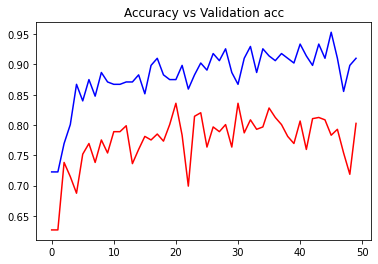

In [18]:
import matplotlib.pyplot as plt

plt.plot(h['acc'], c='blue')
plt.plot(h['val_acc'], c='red')
plt.title('Accuracy vs Validation acc')
plt.show()

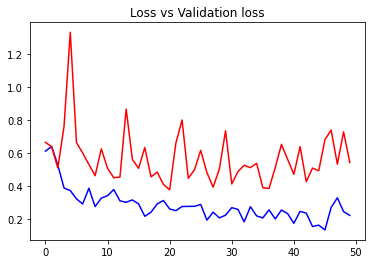

In [19]:
plt.plot(h['loss'], c='blue')
plt.plot(h['val_loss'], c='red')
plt.title('Loss vs Validation loss')
plt.show()

In [20]:
acc = model.evaluate_generator(val_data)[1]

print(f'The accuracy of our model is {acc * 100}%')

The accuracy of our model is 81.25%


In [34]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

path="C:/Users/OSUN SG OFFICE 4/Desktop/x-ray CNN/pneumo3.gif"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img) / 255

input_arr = np.expand_dims(input_arr, axis=0)
pred = model.predict_classes(input_arr)[0][0]
pred

if pred==0:
    print('The image is Normal')
else:
    print("The image is having Pneumonia")

The image is having Pneumonia


In [35]:
#Plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix, Normalization can be applied by setting normalize=True
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix, without normalization')

    print(cm)
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
from sklearn.metrics import confusion_matrix

labels=['NORMAL', 'PNEUMONIA']
cm = confusion_matrix()
plot_confusion_matrix(cm=cm, classes=labels)

NameError: name 'cm' is not defined

In [44]:
predicted = model.predict(val_data)
print(predicted)
rounded_pred = np.argmax(predicted, axis=1)

for i in rounded_pred:
    print(i)

[[0.5340012 ]
 [0.99821484]
 [0.7954564 ]
 [0.7977934 ]
 [0.33722448]
 [0.9696615 ]
 [0.9804613 ]
 [0.15195435]
 [0.92343235]
 [0.15936545]
 [0.05451059]
 [0.07446504]
 [0.9970498 ]
 [0.88227403]
 [0.99820435]
 [0.9999874 ]]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
